# BIOS 512 Final Project
## Eileen Yang (ejyang, PID:730170224)
For my final project, I used a [Fivethirtyeight dataset on Halloween candy](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) to explore the classifications, popularity, sugar content, and price of common Halloween candies and treats.
My goals for the project were:
* To get an idea of the types of candies typically given out on Halloween,
* to find out if certain types of candy were more popular than others, and
* to see if there were any associations between candy price and popularity and between candy sugar content and popularity.

## Getting Set Up
First, I loaded the necessary packages and imported my dataset from Fivethirtyeight's github. I also took a quick look at the dataset using the head() function to see what variables I had to work with.

In [1]:
library("tidyverse")
library("forcats")
library("stringr")
library("reshape2")
install.packages("ggthemes")
library("ggthemes")
library("RColorBrewer")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
df = read.csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")
head(df)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173
2,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294
3,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109
4,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650
5,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146
6,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.34755


Note that the variables "sugarpercent", "pricepercent", and "winpercent" represent sugar content, price, and popularity of each treat relative to the other treats. 

## Classifying by Candy Types
### _Chocolate vs. Fruity_

In [3]:
#Getting a dataframe with type of candy (chocolate, fruity, or other) in a new column

df_candy = df %>% 
            mutate(chocolate=recode(chocolate, 
                         `0`="",
                         `1`="Chocolate")) %>%
            mutate(fruity = recode(fruity, 
                         `0`="",
                         `1`="Fruity")) %>%
            unite(type, chocolate, fruity, sep = " ", remove = FALSE)

df_candy$type = factor(df_candy$type)

df_candy2 = df_candy %>% 
                mutate(type = recode(type, " "="Other","Chocolate Fruity"="Other")) %>%
                select(-chocolate,-fruity)

head(df_candy2)
summary(df_candy2$type)

,competitorname,type,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
,<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,100 Grand,Chocolate,1,0,0,1,0,1,0,0.732,0.860,66.97173
2,3 Musketeers,Chocolate,0,0,1,0,0,1,0,0.604,0.511,67.60294
3,One dime,Other,0,0,0,0,0,0,0,0.011,0.116,32.26109
4,One quarter,Other,0,0,0,0,0,0,0,0.011,0.511,46.11650
5,Air Heads,Fruity,0,0,0,0,0,0,0,0.906,0.511,52.34146
6,Almond Joy,Chocolate,0,1,0,0,0,1,0,0.465,0.767,50.34755


Other     Fruity Chocolate  
        12         37         36

Since the original dataset had many variables to classify each type of candy, I decided to simplify these classifications into three groups: Chocolate, Fruity, and Other (those in the "Other" group were either candies that were neither chocolate nor fruity, or were non-edible treats like dimes and quarters. Additionally, there was one candy (tootsie roll) that was both Chocolate and Fruity; to simplify things, I placed it in the "Other" category as well.
By recoding the data using the method above, I found that out of the 86 treats in the dataset, there were 37 fruity candies, 36 chocolate candies, and 12 non-fruity and non-chocolate treats that were commonly given out to trick-or-treaters.
### _More in-depth classification_

In [4]:
#Getting a dataframe with more specific type of candy 

df_all = df %>% 
            mutate(chocolate=recode(chocolate, 
                         `0`="",
                         `1`="Chocolate")) %>%
            mutate(fruity = recode(fruity, 
                         `0`="",
                         `1`="Fruity")) %>%
            mutate(caramel = recode(caramel, 
                         `0`="",
                         `1`="Caramel")) %>%
            mutate(peanutyalmondy = recode(peanutyalmondy, 
                         `0`="",
                         `1`="Nutty")) %>%
            mutate(nougat = recode(nougat, 
                         `0`="",
                         `1`="Nougat")) %>%
            mutate(crispedricewafer = recode(crispedricewafer, 
                         `0`="",
                         `1`="Crispy")) %>%
            unite(type, chocolate, fruity, caramel, peanutyalmondy, nougat, 
                  crispedricewafer, sep = "", remove = FALSE)

df_all$type[df_all$type==""] <- "Unclassified"
df_all$type = factor(df_all$type)

df_all2 = df_all %>% 
            select(-chocolate,-fruity, -caramel, -peanutyalmondy, -nougat,-crispedricewafer,-hard,-bar,-pluribus)

head(df_all2)


,competitorname,type,sugarpercent,pricepercent,winpercent
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,100 Grand,ChocolateCaramelCrispy,0.732,0.860,66.97173
2,3 Musketeers,ChocolateNougat,0.604,0.511,67.60294
3,One dime,Unclassified,0.011,0.116,32.26109
4,One quarter,Unclassified,0.011,0.511,46.11650
5,Air Heads,Fruity,0.906,0.511,52.34146
6,Almond Joy,ChocolateNutty,0.465,0.767,50.34755


I also wanted to classify the types of candies based on the other categories provided in the dataset, like "Caramel" and "Nougat" to get a better idea of the most common types of candies. Thus, I created a dataset that classified each candy based on all of their features. For example, in this new dataset, a chocolate like Almond Joy would be classified as "ChocolateNutty". Note that the "Unclassified" group contained all of the treats that didn't fall into any of the other categories.

## Visualizing the Classifications of Candy
### _Fruity vs. Chocolate_

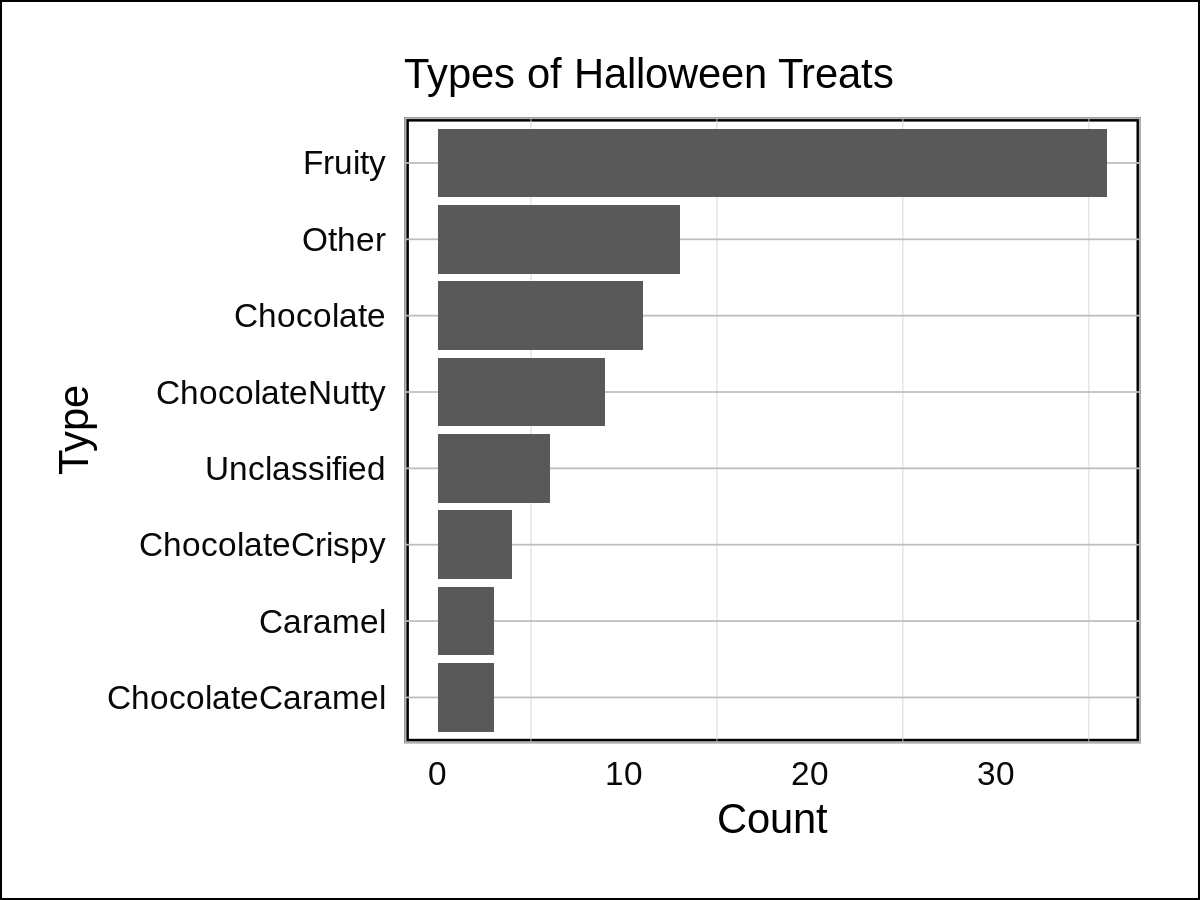

In [5]:
#Visualizing the kinds of candy/treats in the dataset
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

df_all3 = df_all2 %>% 
        mutate(type_lumped = type %>% fct_lump(n=6) %>% fct_infreq() %>% fct_rev)

p = ggplot(df_all3, aes(y=type_lumped)) + geom_bar() + theme_calc()
p = p + ggtitle('Types of Halloween Treats')
p = p + labs(x= 'Count', y= "Type")
p = p + theme(axis.text = element_text(size=8, colour="gray3"), 
              axis.title.y = element_text(colour = "black"), 
              axis.ticks = element_blank(),
              plot.title = element_text(colour="black", size=10),
              panel.grid.minor=element_line(size=.1, colour="lightgray"),
              panel.grid.major=element_line(size=.2, colour="gray"),
              plot.margin = margin(5, 5, 5, 5, "mm"),
              panel.background = element_rect(fill = "white",  size = 1, linetype = "solid"))
p

Using a bar graph, I visualized what kinds of candy were most common. Since many of the chocolate candies fell into multiple categories (ex. ChocolateNutty, ChocolateCrispy), the overarching "Chocolate" category was split up quite a bit.

### _Within Chocolate_

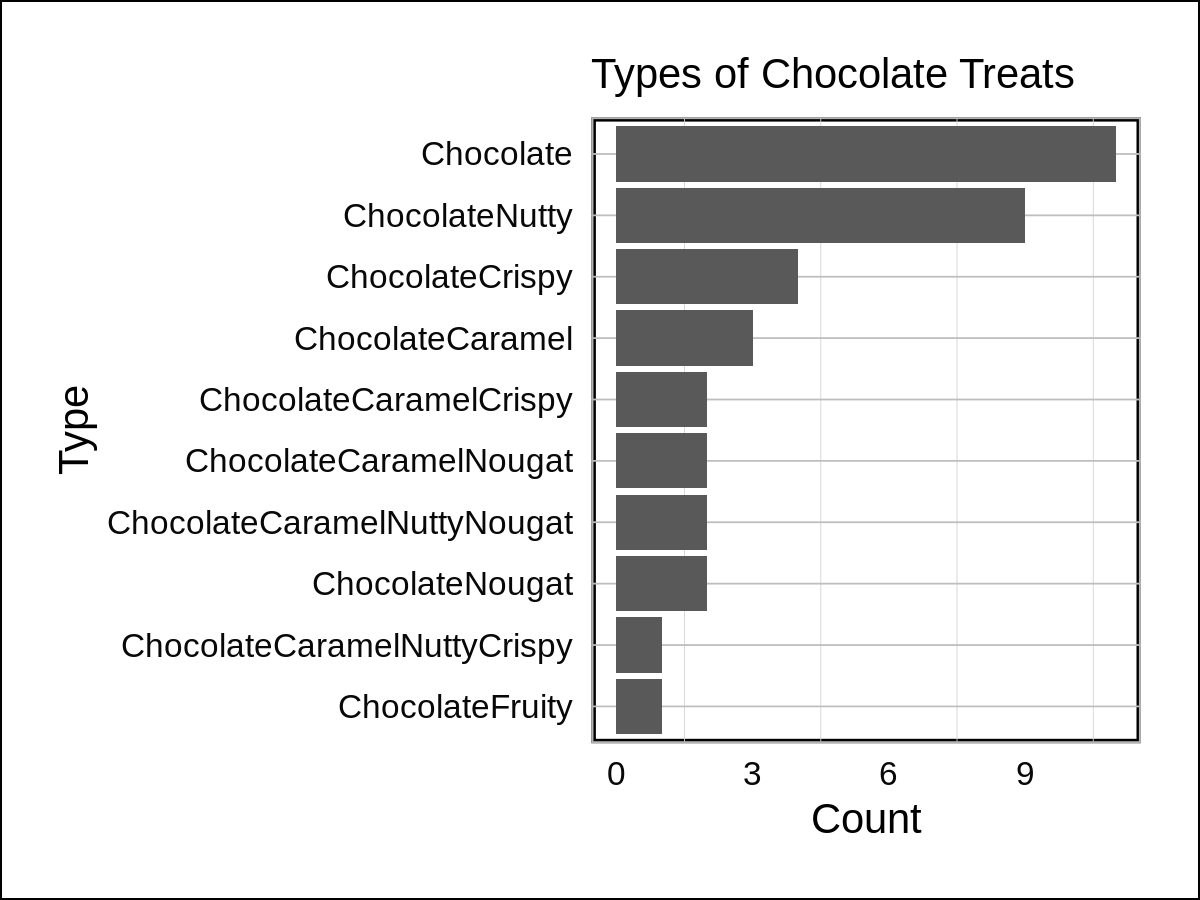

In [6]:
#Taking a closer look at the types of chocolate we have
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

df_choc =  df_all2 %>% 
        filter(str_detect(type, "Chocolate") == TRUE) %>%
        mutate(type_lumped = type %>% fct_lump(n=10) %>% fct_infreq() %>% fct_rev)


p2 = ggplot(df_choc, aes(y=type_lumped)) + geom_bar() + theme_calc()
p2 = p2 + ggtitle('Types of Chocolate Treats')
p2 = p2 + labs(x= 'Count', y= "Type")
p2 = p2 + theme(axis.text = element_text(size=8, colour="gray3"), 
              axis.title.y = element_text(colour = "black"), 
              axis.ticks = element_blank(),
              plot.title = element_text(colour="black", size=10),
              panel.grid.minor=element_line(size=.1, colour="lightgray"),
              panel.grid.major=element_line(size=.2, colour="gray"),
              plot.margin = margin(5, 5, 5, 5, "mm"),
              panel.background = element_rect(fill = "white",  size = 1, linetype = "solid"))
p2


Since the chocolate candies had been split up quite a bit due to chocolate candies having multiple classifications, I wanted to get a more insightful view what chocolate candies were most common. From the resulting bar graph, we see that purely Chocolate candies were most common, followed closely by Chocolate Nutty candies. These two top categories were then followed by the Chocolate Crispy and Chocolate Caramel categories.

## Visualizing Popularity, Sugar Content, and Price by Candy Type: Boxplots
After sorting the candies into meaningful categories, I used a histograms and boxplots to see how popularity, sugar content, and prices differed between the candy categories. For these visualizations, I used the simple categorizations of "Chocolate","Fruity", and "Other".

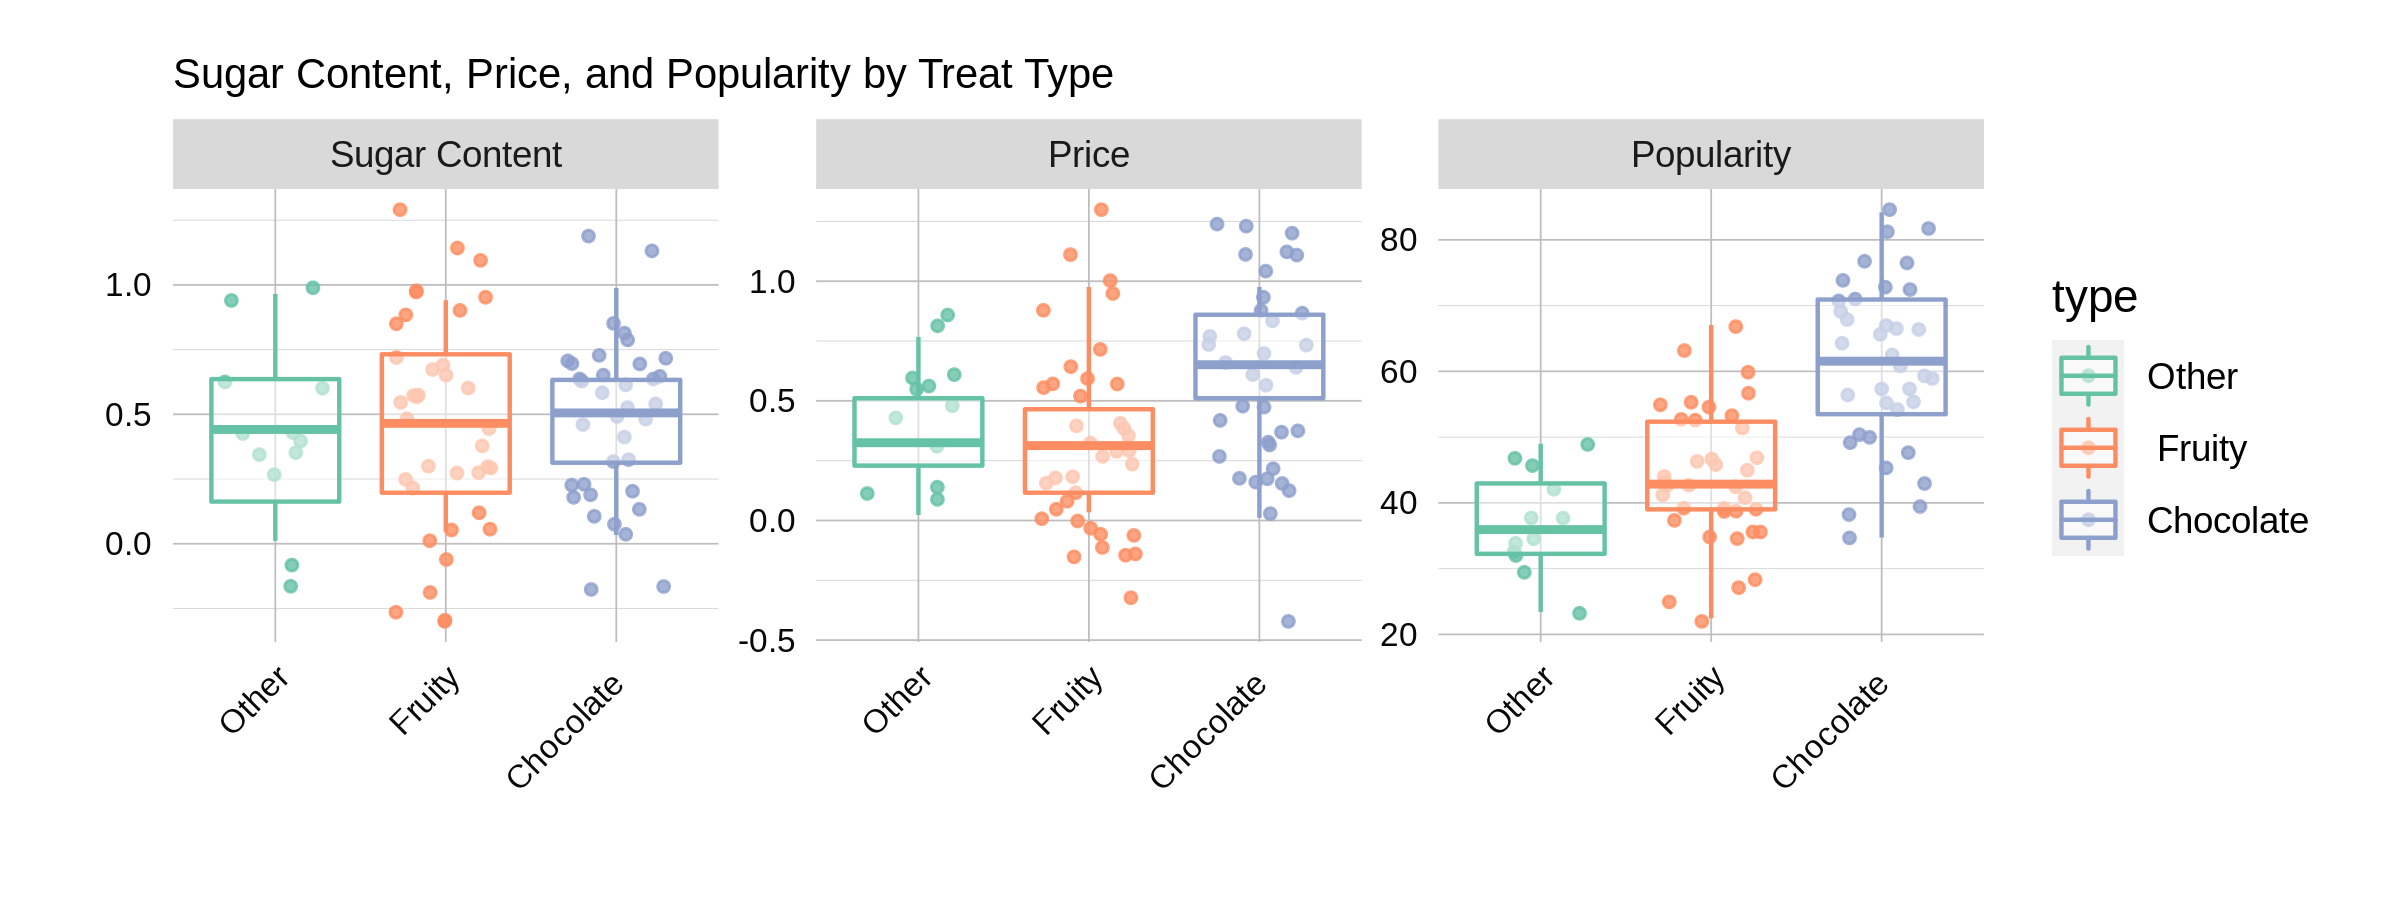

In [11]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 3)

dfmelt <- melt(df_candy2, measure.vars=10:12)   
jitter = position_jitter(height=0.5, width=0.3)

p = ggplot(dfmelt, aes(x=type, y=value, color=type))
p = p + geom_jitter(position=jitter, size=1, alpha=0.8) + geom_boxplot(alpha=0.5)
p = p + ggtitle('Sugar Content, Price, and Popularity by Treat Type') 


var.labs <- c("Sugar Content","Price","Popularity")
names(var.labs) <- c("sugarpercent","pricepercent","winpercent")

p = p + labs(x=  '', y= '')
p = p + theme(axis.text.x = element_text(hjust = 1, angle = 45)) + facet_wrap(~variable, scales="free_y", labeller = labeller(variable = var.labs)) 
p = p + theme(axis.text = element_text(size=8, colour="gray3"), 
              axis.title.y = element_text(colour = "black"), 
              axis.ticks = element_blank(),
              plot.title = element_text(colour="black", size=10),
              panel.grid.minor=element_line(size=.1, colour="lightgray"),
              panel.grid.major=element_line(size=.2, colour="gray"),
              plot.margin = margin(5, 5, 5, 5, "mm"),
              panel.background = element_rect(fill = "white",  size = 1, linetype = "solid"))
p = p + scale_color_brewer(palette="Set2")
p

From the above boxplots, we see that the distribution of sugar content among the three different categories of Halloween treats was roughly similar. For price, chocolate treats tended to have a higher price compared to fruity treats or "other" treats. For popularity, there is a clear difference in popularity between the three categories, with chocolate treats being the most popular, followed by fruity treats. "Other" treats were the least popular 

## Associations between Sugar Content/Price and Popularity
The final part of my project was to visualize any potential associations between sugar content or price and popularity, which I did using scatterplots.
### _Associations between Sugar Content and Popularity_

`geom_smooth()` using formula 'y ~ x'



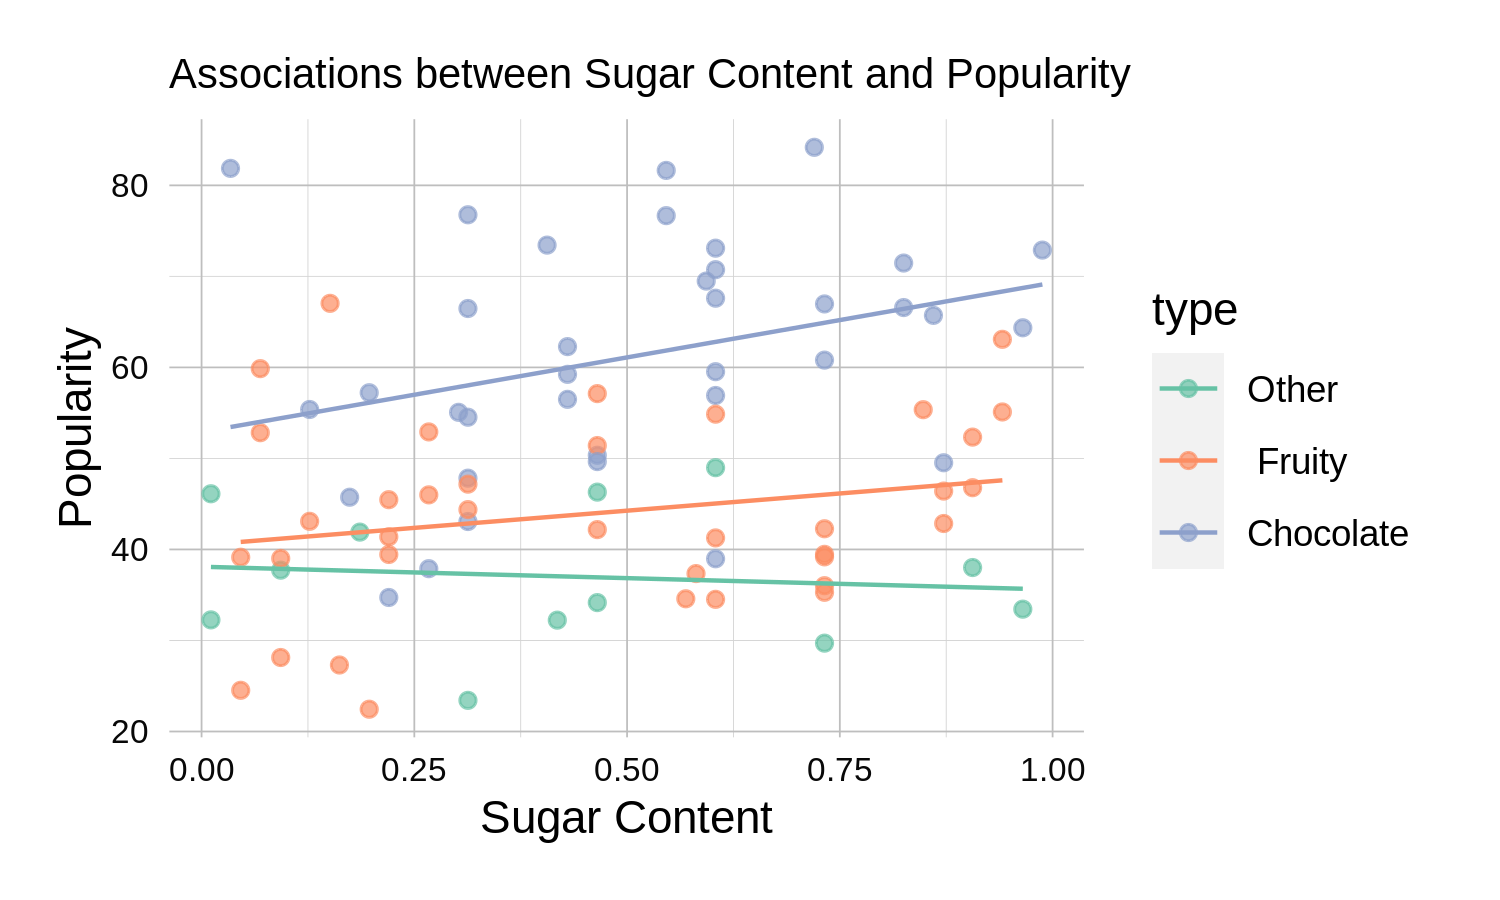

In [12]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(df_candy2, aes(x = sugarpercent, y = winpercent, color=type)) + 
    geom_point(alpha=0.7) + geom_smooth(method = "lm", se = FALSE, size=.5) 

p = p + ggtitle('Associations between Sugar Content and Popularity') 

p = p + labs(x= 'Sugar Content', y= 'Popularity')

p = p + theme(axis.text = element_text(size=8, colour="gray3"), 
              axis.title.y = element_text(colour = "black"), 
              axis.ticks = element_blank(),
              plot.title = element_text(colour="black", size=10),
              panel.grid.minor=element_line(size=.1, colour="lightgray"),
              panel.grid.major=element_line(size=.2, colour="gray"),
              plot.margin = margin(5, 5, 5, 5, "mm"),
              panel.background = element_rect(fill = "white",  size = 1, linetype = "solid"))

p = p + scale_color_brewer(palette="Set2")
p

From the above scatterplot, we see that there are no strong associations between sugar content and the popularity for different candies. Among the chocolate and fruity groups, there were slight positive associations between sugar content and popularity, while there was a little to no association between sugar content and popularity in the "Other" category. This makes sense given that many of the treats in the "Other" Category were not actually candy. Overall, this graph reflects the information we gleaned from the earlier boxplot visualizations; in general, the chocolate candies are seen to have higher popularity than the other treats.

### _Associations between Price and Popularity_

`geom_smooth()` using formula 'y ~ x'



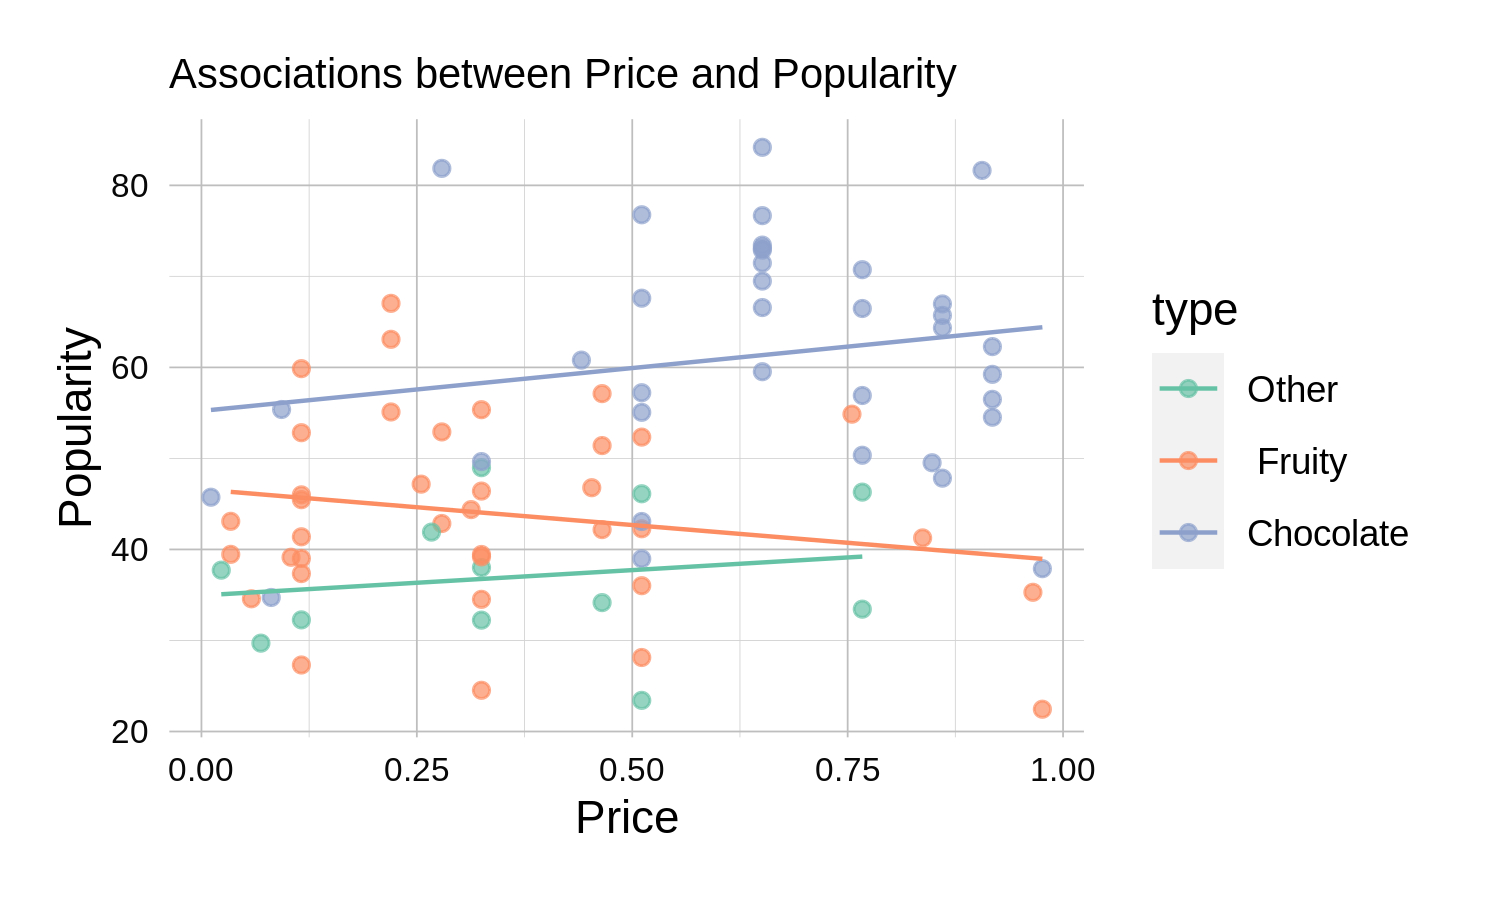

In [14]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)
p2 = ggplot(df_candy2, aes(x = pricepercent, y = winpercent, color=type)) + 
        geom_point(alpha=0.7) + geom_smooth(method = "lm", se = FALSE, size=.5)
p2 = p2 + ggtitle('Associations between Price and Popularity') 

p2 = p2 + labs(x= 'Price', y= 'Popularity')

p2 = p2 + theme(axis.text = element_text(size=8, colour="gray3"), 
              axis.title.y = element_text(colour = "black"), 
              axis.ticks = element_blank(),
              plot.title = element_text(colour="black", size=10),
              panel.grid.minor=element_line(size=.1, colour="lightgray"),
              panel.grid.major=element_line(size=.2, colour="gray"),
              plot.margin = margin(5, 5, 5, 5, "mm"),
              panel.background = element_rect(fill = "white",  size = 1, linetype = "solid"))

p2 = p2 + scale_color_brewer(palette="Set2")
p2

In this scatterplot, we see slight positive associations between price and popularity for the Chocolate candies and the "Other" treats, while there is a slightly negative association among the Fruity candies. However, these trends were not very strong. Overall, the plot reflects our earlier findings of chocolate candies being generally more expensive than other treats. 